In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import glob

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor, KerasClassifier
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import autokeras as ak


In [2]:
#data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/TPath_300_finish_data.pkl')
data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish_D2_I7000_F9000/TPath_300_finish_data_D2.pkl')

data

,X-Koordinate,Y-Koordinate,Zeitpunkt,Strom,Kraft,Temperatur
0,0.0000,-0.00200,300,7000,9000,532.25
1,0.0000,-0.00198,300,7000,9000,540.69
2,0.0000,-0.00196,300,7000,9000,549.09
3,0.0000,-0.00194,300,7000,9000,557.38
4,0.0000,-0.00192,300,7000,9000,565.57
...,...,...,...,...,...,...
25321,0.0025,0.00192,300,7000,9000,486.58
25322,0.0025,0.00194,300,7000,9000,481.54
25323,0.0025,0.00196,300,7000,9000,477.19
25324,0.0025,0.00198,300,7000,9000,473.54


In [3]:
df = data.drop(data.columns[2:5], axis = 1)
df

,X-Koordinate,Y-Koordinate,Temperatur
0,0.0000,-0.00200,532.25
1,0.0000,-0.00198,540.69
2,0.0000,-0.00196,549.09
3,0.0000,-0.00194,557.38
4,0.0000,-0.00192,565.57
...,...,...,...
25321,0.0025,0.00192,486.58
25322,0.0025,0.00194,481.54
25323,0.0025,0.00196,477.19
25324,0.0025,0.00198,473.54


In [4]:
df1 = df.sample(frac=1, random_state=42)  # Hier wird 42 als Random State verwendet, um die Ergebnisse reproduzierbar zu machen

print(df1)
df_reset = df1.reset_index(drop=True)
df_reset

       X-Koordinate  Y-Koordinate  Temperatur
5099        0.00050      -0.00052      896.41
12799       0.00126       0.00072      836.73
15071       0.00148       0.00194      488.76
24620       0.00244      -0.00004      747.54
11071       0.00110      -0.00168      661.61
...             ...           ...         ...
21575       0.00214      -0.00064      784.07
5390        0.00052       0.00128      728.92
860         0.00008      -0.00088      863.65
15795       0.00156       0.00034      844.40
23654       0.00234       0.00074      753.46

[25326 rows x 3 columns]


,X-Koordinate,Y-Koordinate,Temperatur
0,0.00050,-0.00052,896.41
1,0.00126,0.00072,836.73
2,0.00148,0.00194,488.76
3,0.00244,-0.00004,747.54
4,0.00110,-0.00168,661.61
...,...,...,...
25321,0.00214,-0.00064,784.07
25322,0.00052,0.00128,728.92
25323,0.00008,-0.00088,863.65
25324,0.00156,0.00034,844.40


In [5]:
label = df_reset["Temperatur"]
# Korrektur: Verwenden Sie den Spaltennamen direkt, ohne Indexierung der columns-Eigenschaft
df1 = df_reset.drop("Temperatur", axis=1)
X = df1
y = label


In [6]:
X

,X-Koordinate,Y-Koordinate
0,0.00050,-0.00052
1,0.00126,0.00072
2,0.00148,0.00194
3,0.00244,-0.00004
4,0.00110,-0.00168
...,...,...
25321,0.00214,-0.00064
25322,0.00052,0.00128
25323,0.00008,-0.00088
25324,0.00156,0.00034


In [7]:
y

0        896.41
1        836.73
2        488.76
3        747.54
4        661.61
          ...  
25321    784.07
25322    728.92
25323    863.65
25324    844.40
25325    753.46
Name: Temperatur, Length: 25326, dtype: float64

In [8]:
 # train_df enthält 80% der Daten, test_df enthält 20% der Daten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [9]:
# Initialisiere einen MinMaxScaler für die Features
scaler_features = MinMaxScaler()
scaler_features2 = MinMaxScaler()
# Skaliere X_train und X_test
X_train_scaled = scaler_features.fit_transform(X_train)
X_test_scaled = scaler_features.transform(X_test)  # Nutze unterschiedliche Skalierungsparameter

# Initialisiere einen SEPARATEN MinMaxScaler für das Ziel, wenn nötig
scaler_target = MinMaxScaler()


# Skaliere y_train und y_test. Beachte, dass y_train.reshape(-1, 1) verwendet wird, da MinMaxScaler 
# erwartet, dass die Eingaben als 2D-Arrays kommen, und Ziele normalerweise als 1D-Arrays vorliegen.
y_train_scaled = scaler_target.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_target.transform(y_test.values.reshape(-1, 1))


In [10]:
X_train_scaled

array([[1.   , 0.15 ],
       [0.984, 0.49 ],
       [0.224, 0.905],
       ...,
       [0.04 , 0.585],
       [0.976, 0.815],
       [0.744, 0.785]])

In [ ]:
# Lernplan erstellen
#initial_learning_rate = 0.1
#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate, decay_steps=100, decay_rate=0.9, staircase=True)

In [14]:
# Netzwerkarchitektur
model = Sequential([
    # Eingabeschicht
    Dense(384, activation='relu', input_shape=(2,), kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001)),
    
    Dense(384, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001)),
    Dense(160, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001)),
    Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001)),
          
    Dense(384, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001)),
          
    Dense(192, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001)),
    #Dropout(0.01),
    # Versteckte Schicht
    Dense(32, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001)),
    Dense(448, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001)),
    Dense(64, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0001)),
    #Dropout(0.01),
    # Ausgabeschicht für Regression (1 Einheit ohne Aktivierungsfunktion)
    Dense(1 , activation = 'linear')
])

# Optimierer
optimizer = 'adam' #Adam(learningrate =  0.001)

# Modell kompilieren (Verwendung von mean_squared_error als Verlustfunktion für Regression)
model.compile(optimizer=optimizer,
              loss='mean_squared_error',
              metrics=['mae'])  # Metriken für Regression: Mean Absolute Error und Mean Squared Error

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1, mode='min', restore_best_weights=True, min_delta = 0.0001)

# Trainingsparameter
batch_size = 50
epochs = 100

# Modell trainieren (Annahme: X_train, y_train, X_val, y_val sind vordefiniert)
history = model.fit(X_train_scaled, y_train_scaled,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/100
325/325 [==============================] - 3s 4ms/step - loss: 0.3484 - mae: 0.1646 - val_loss: 0.2354 - val_mae: 0.0221
Epoch 2/100
325/325 [==============================] - 1s 3ms/step - loss: 0.2183 - mae: 0.0327 - val_loss: 0.2024 - val_mae: 0.0491
Epoch 3/100
325/325 [==============================] - 1s 3ms/step - loss: 0.1862 - mae: 0.0159 - val_loss: 0.1733 - val_mae: 0.0137
Epoch 4/100
325/325 [==============================] - 1s 3ms/step - loss: 0.1627 - mae: 0.0168 - val_loss: 0.1525 - val_mae: 0.0232
Epoch 5/100
325/325 [==============================] - 1s 3ms/step - loss: 0.1423 - mae: 0.0134 - val_loss: 0.1330 - val_mae: 0.0124
Epoch 6/100
325/325 [==============================] - 1s 3ms/step - loss: 0.1254 - mae: 0.0191 - val_loss: 0.1165 - val_mae: 0.0102
Epoch 7/100
325/325 [==============================] - 1s 3ms/step - loss: 0.1096 - mae: 0.0155 - val_loss: 0.1018 - val_mae: 0.0063
Epoch 8/100
325/325 [==============================] - 1s 4ms/step - 

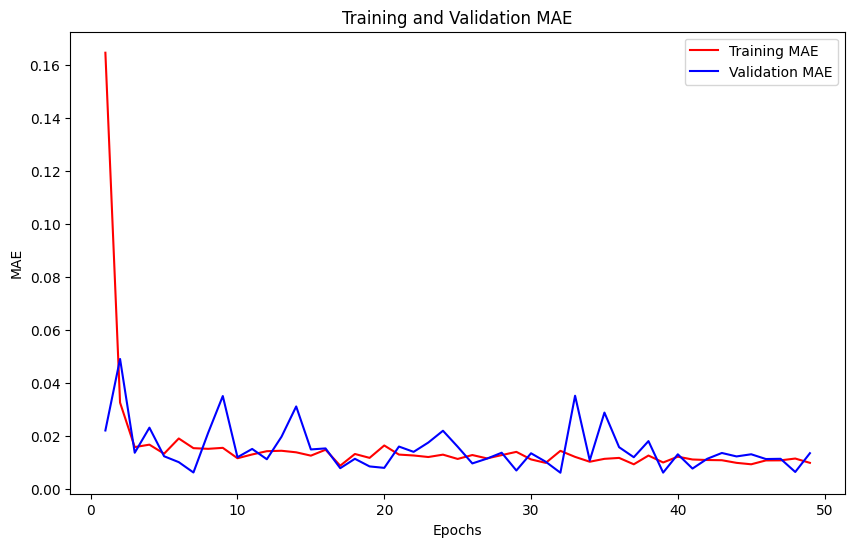

In [15]:
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)

# MAE Diagramm
plt.figure(figsize=(10, 6))
plt.plot(epochs, mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [16]:
scaled_predicted_values = model.predict(X_test_scaled, verbose = 0)

# Führen Sie die Rücktransformation der skalierten Werte durch
original_predicted_values = scaler_target.inverse_transform(scaled_predicted_values)
original_actual_values = scaler_target.inverse_transform(y_test_scaled)  # y_test sind die skalierten tatsächlichen Werte
print(f' Bsp. Predicted: {original_predicted_values[100]} Actual: {original_actual_values[100]} ')

def calculate_mae(list1, list2):
    # Stelle sicher, dass beide Listen die gleiche Länge haben
    if len(list1) != len(list2):
        raise ValueError("Listen müssen die gleiche Länge haben")
    
    # Berechne die absolute Differenz zwischen den Elementen der Listen
    differences = [abs(x - y) for x, y in zip(list1, list2)]
    
    # Berechne den Durchschnitt der absoluten Differenzen
    mae = sum(differences) / len(differences)
    
    return mae

# Beispiel
list1 = original_predicted_values
list2 = original_actual_values

mae = calculate_mae(list1, list2)
print(f"Durchschnittliche Abweichung (MAE): {mae}")

 Bsp. Predicted: [788.4648] Actual: [783.15] 
Durchschnittliche Abweichung (MAE): [5.43920616]


In [17]:
df_result = pd.DataFrame({'Echt': [val[0] for val in list1], 'Vorhergesagt': [val[0] for val in list2]})
df_result['X-Koordinate'] = X_test_scaled[:, 0]
df_result['Y-Koordinate'] = X_test_scaled[:, 1]

df_result['Differenz'] = df_result['Echt'] - df_result['Vorhergesagt']
df_result['Differenz'].sort_values()
sorted_df = df_result.sort_values(by= 'Differenz')
Anzahl_Punkte = (sorted_df['Differenz'] > 10).sum()
print("Anzahl der Werte die kleiner sind:", Anzahl_Punkte)
 
sorted_df

Anzahl der Werte die kleiner sind: 640


,Echt,Vorhergesagt,X-Koordinate,Y-Koordinate,Differenz
4855,582.890747,628.54,1.000,0.940,-45.649253
2316,599.958618,642.22,0.992,0.930,-42.261382
4353,607.411316,642.43,0.976,0.925,-35.018684
2187,625.036926,657.61,0.976,0.915,-32.573074
731,597.796509,629.54,0.968,0.930,-31.743491
...,...,...,...,...,...
2686,599.910461,566.78,0.952,0.000,33.130461
822,575.750916,541.83,0.800,0.000,33.920916
1499,593.573120,557.34,0.920,0.000,36.233120
2746,583.394226,546.15,0.856,0.000,37.244226


# GridSearch

In [ ]:
# Schritt 1: Definiere dein Modell als eine Funktion, die Hyperparameter akzeptiert
def build_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(units=64, activation=activation, input_dim=X_train_scaled.shape[1]))
    model.add(Dense(units=32, activation=activation))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

# Schritt 2: Erstelle eine Instanz von KerasRegressor ohne batch_size und epochs im param_grid
model = KerasRegressor(model=build_model, verbose=1)

# Schritt 3: Definiere den Parameter-Raum für die Grid-Suche OHNE batch_size und epochs
param_grid = {
    'model__optimizer': ['adam', 'sgd'],
    'model__activation': ['relu', 'tanh']
}

# Optional: Definiere Fit-Parameter (wie batch_size und epochs) separat
fit_params = {
    'batch_size': 32,
    'epochs': 10
}

# Schritt 4: Führe GridSearchCV aus mit fit_params, wenn nötig
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_scaled, y_train_scaled, **fit_params)

# Ergebnisse ausgeben
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for mean_score, params in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['params']):
    print("%f with: %r" % (mean_score, params))


In [ ]:
def build_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(units=64, activation=activation, input_dim=X_train_scaled.shape[1]))
    model.add(Dense(units=32, activation=activation))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

model = KerasRegressor(model=build_model, verbose=1)

param_grid = {
    'model__optimizer': ['adam', 'sgd'],
    'model__activation': ['relu', 'tanh'],
    'fit__batch_size': [10, 20, 32],  # Testen verschiedener batch_size Werte
    'fit__epochs': [5, 10]  # Optional: Testen verschiedener epoch Werte
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_scaled, y_train_scaled)

# Ergebnisse ausgeben
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for mean_score, params in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['params']):
    print("%f with: %r" % (mean_score, params))


In [13]:
from keras_tuner import RandomSearch

# Definieren der Funktion, die das Modell erstellt
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('input_units', min_value=32, max_value=512, step=32), input_shape=(2,), activation='relu'))
    # Hinzufügen von Schichten basierend auf dem Suchraum
    for i in range(hp.Int('n_layers', 1, 10)):
        model.add(Dense(hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Erstellen des RandomSearch Objekts
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=100,  # Anzahl der zu testenden Modellkonfigurationen
    executions_per_trial=1,  # Anzahl der Male, die jede Modellkonfiguration trainiert wird
    directory='random_search',  # Verzeichnis zur Speicherung der Suchlogs
    project_name='neural_network_optimization_D2'
)

# Durchführung des Random Search
tuner.search(X_train_scaled, y_train_scaled, epochs=20, batch_size=50, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

# Abrufen des besten Modells
best_model = tuner.get_best_models(num_models=1)[0]

# Zusammenfassung des besten Modells
best_model.summary()

# Sie können auch die besten Hyperparameter direkt abrufen
best_hyperparameters = tuner.get_best_hyperparameters()[0]
print(best_hyperparameters.values)


Trial 100 Complete [00h 00m 26s]
val_loss: 4.868703763349913e-05

Best val_loss So Far: 5.40524388270569e-06
Total elapsed time: 00h 57m 20s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 384)               1152      
                                                                 
 dense_1 (Dense)             (None, 384)               147840    
                                                                 
 dense_2 (Dense)             (None, 160)               61600     
                                                                 
 dense_3 (Dense)             (None, 128)               20608     
                                                                 
 dense_4 (Dense)             (None, 384)               49536     
                                                                 
 dense_5 (Dense)             (None, 192)       